<h2 style="font-weight: 700; text-align: center">Image Enhancement - 4 (Neighbourhood Processing - 2)</h2>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Importing subject image as a grayscale image

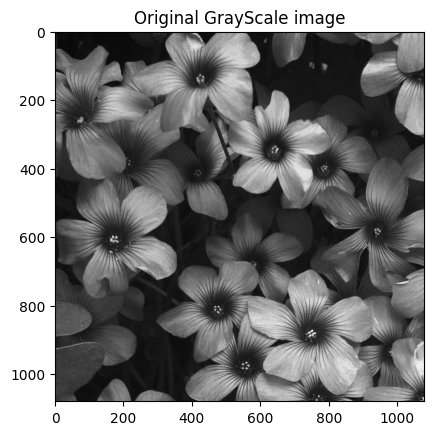

In [2]:
img = cv.imread("../Sample Images/Oxalis.jpg")
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgg = imgg[:1080, :1080]
plt.title("Original GrayScale image")
plt.imshow(imgg, cmap="gray")
plt.show()

#### Utility Function - Matplotting the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(12, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### Image-Mask Convolution function

In [4]:
def convolute_image(img, mask):
  mask = np.array(mask)
  conv_img = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]
  for x in range(1, img.shape[0] - 1):
    for y in range(1, img.shape[1] - 1):
      convoluted = img[x - 1: x + 2, y - 1: y + 2] * mask
      val = sum(map(sum, convoluted))
      if val > 0:
        conv_img[x][y] = val if val <= 255 else 255
      else:
        conv_img[x][y] = 0
  return np.array(conv_img)

#### Convolution using a High Pass Filter

[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]


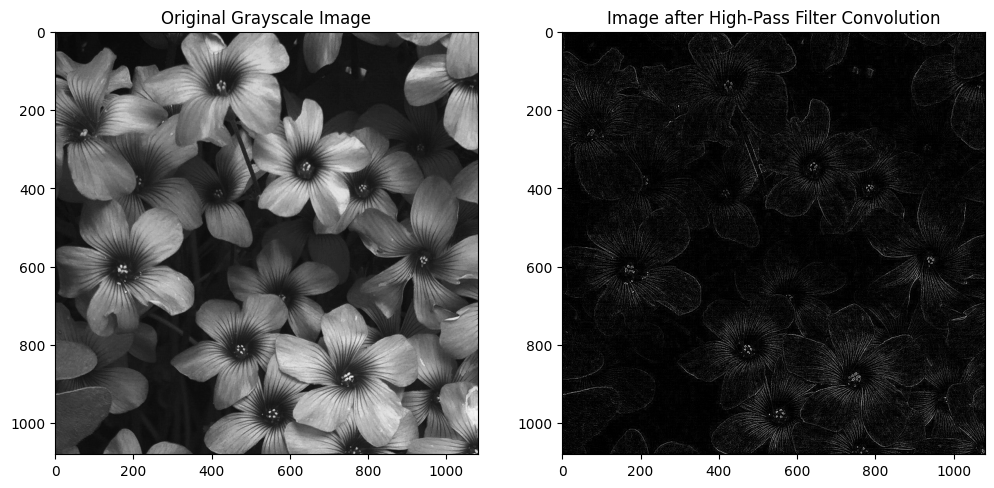

In [5]:
mask = [[8 if j == 1 and i == 1 else -1 for j in range(3)] for i in range(3)]        # a 3 x 3 high pass filter
print(mask)
hpf_img = convolute_image(imgg, mask)
matplot_images(imgg, hpf_img, titles=["Original Grayscale Image", "Image after High-Pass Filter Convolution"])

#### Convolution using High Boost Filter

[[-1, -1, -1], [-1, 8.9, -1], [-1, -1, -1]]


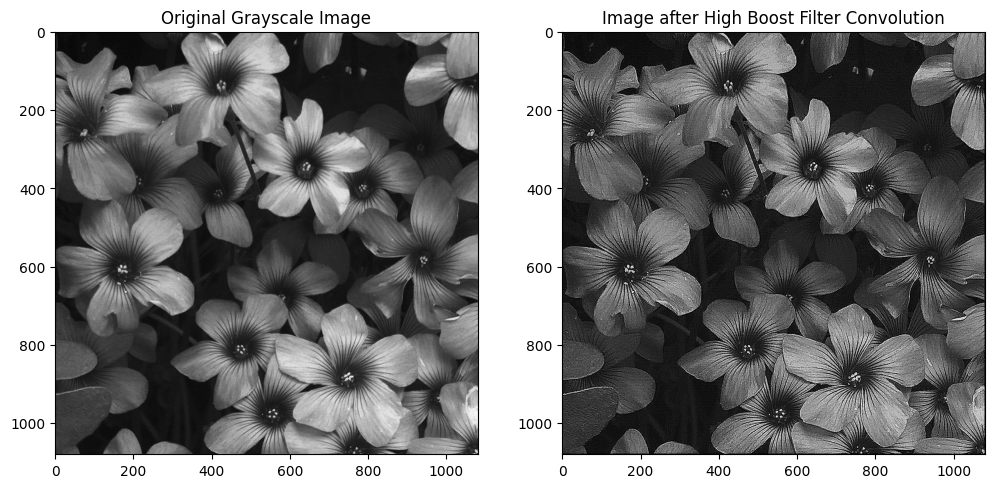

In [6]:
A = 1.1
X = 9 * A - 1
mask = [[X if j == 1 and i == 1 else -1 for j in range(3)] for i in range(3)]        # a 3 x 3 high boost filter
print(mask)
hbf_img = convolute_image(imgg, mask)
matplot_images(imgg, hbf_img, titles=["Original Grayscale Image", "Image after High Boost Filter Convolution"])

#### Conclusion

- The high pass filter detected and highlighted most of the edges in the image as they are high-frequency zones.
- The high boost filter enhanced(sharpened) the image by the formula A * (Original) - LPF in mask form.